In [3]:
# import the basic library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import chardet

In [5]:
os.getcwd()

'C:\\Users\\user\\Documents\\Learnbay\\Project\\Shopping Mall'

In [6]:
with open('shopping_mall.csv', 'rb') as f:
    enc = chardet.detect(f.read())
shop_df=pd.read_csv("shopping_mall.csv",encoding = enc['encoding'])

In [7]:
shop_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom


In [8]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [11]:
shop_df.shape

(75120, 8)

In [9]:
shop_df.nunique()

InvoiceNo      3477
StockCode      3160
Description    3080
Quantity        262
InvoiceDate    3198
UnitPrice       510
CustomerID     1428
Country          30
dtype: int64

In [10]:
# dropping the insignificance data
shop_df1 = shop_df.drop(['StockCode', 'Description','Country'],axis = 1)

In [11]:
shop_df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536627,1,12/2/2010 10:53,19.95,15658.0
1,536627,2,12/2/2010 10:53,8.50,15658.0
2,536627,3,12/2/2010 10:53,5.95,15658.0
3,536627,12,12/2/2010 10:53,1.45,15658.0
4,536627,4,12/2/2010 10:53,12.75,15658.0
...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0
75116,556023,4,6/8/2011 12:21,0.83,14527.0
75117,556023,4,6/8/2011 12:21,0.55,14527.0
75118,556023,4,6/8/2011 12:21,1.65,14527.0


In [12]:
print(shop_df1["Quantity"].min())
print(shop_df1["UnitPrice"].min())

-74215
0.0


## These negative value in quantity and unit price indicate the return the shipment 

## In simple way ,the return the shipment  we can consider there is NO SALES DONE:- No Profit No loss .
 

In [13]:
def handle_neg_values(num):
    if num<0:
        return 0
    else:
        return num

In [14]:
shop_df1["Quantity"]=[handle_neg_values(x) for x in shop_df1.Quantity]
shop_df1["UnitPrice"]=[handle_neg_values(x) for x in shop_df1.UnitPrice]

In [15]:
print(shop_df1["Quantity"].min())
print(shop_df1["UnitPrice"].min())

0
0.0


### Creating a new column of total amount

In [16]:
shop_df1["Total"]=shop_df1["Quantity"]*shop_df1["UnitPrice"]

In [17]:
shop_df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536627,1,12/2/2010 10:53,19.95,15658.0,19.95
1,536627,2,12/2/2010 10:53,8.50,15658.0,17.00
2,536627,3,12/2/2010 10:53,5.95,15658.0,17.85
3,536627,12,12/2/2010 10:53,1.45,15658.0,17.40
4,536627,4,12/2/2010 10:53,12.75,15658.0,51.00
...,...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0,4.95
75116,556023,4,6/8/2011 12:21,0.83,14527.0,3.32
75117,556023,4,6/8/2011 12:21,0.55,14527.0,2.20
75118,556023,4,6/8/2011 12:21,1.65,14527.0,6.60


In [18]:
print(shop_df1["Quantity"].min())
print(shop_df1["UnitPrice"].min())
print(shop_df1["Total"].min())

0
0.0
0.0


In [19]:
shop_df1.info

<bound method DataFrame.info of       InvoiceNo  Quantity      InvoiceDate  UnitPrice  CustomerID  Total
0        536627         1  12/2/2010 10:53      19.95     15658.0  19.95
1        536627         2  12/2/2010 10:53       8.50     15658.0  17.00
2        536627         3  12/2/2010 10:53       5.95     15658.0  17.85
3        536627        12  12/2/2010 10:53       1.45     15658.0  17.40
4        536627         4  12/2/2010 10:53      12.75     15658.0  51.00
...         ...       ...              ...        ...         ...    ...
75115    556023         1   6/8/2011 12:21       4.95     14527.0   4.95
75116    556023         4   6/8/2011 12:21       0.83     14527.0   3.32
75117    556023         4   6/8/2011 12:21       0.55     14527.0   2.20
75118    556023         4   6/8/2011 12:21       1.65     14527.0   6.60
75119    556023         2   6/8/2011 12:21       5.95     14527.0  11.90

[75120 rows x 6 columns]>

#### The unit price and quantity are insignificance as we have total amount.

In [20]:
shop_df2 = shop_df1.drop(['Quantity', 'UnitPrice'],axis = 1)
shop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   InvoiceDate  75120 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        75120 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


#### There are some missing value in customer id .

In [21]:
shop_df3 = shop_df2.dropna(axis = 0, how ='any')
shop_df3

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,12/2/2010 10:53,15658.0,19.95
1,536627,12/2/2010 10:53,15658.0,17.00
2,536627,12/2/2010 10:53,15658.0,17.85
3,536627,12/2/2010 10:53,15658.0,17.40
4,536627,12/2/2010 10:53,15658.0,51.00
...,...,...,...,...
75115,556023,6/8/2011 12:21,14527.0,4.95
75116,556023,6/8/2011 12:21,14527.0,3.32
75117,556023,6/8/2011 12:21,14527.0,2.20
75118,556023,6/8/2011 12:21,14527.0,6.60


In [22]:
shop_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    48212 non-null  object 
 1   InvoiceDate  48212 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        48212 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


### Converting invoice date to date month by importing calander

In [23]:
shop_df3["InvoiceDate"]=pd.to_datetime(shop_df3["InvoiceDate"])
shop_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
 3   Total        48212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.8+ MB


In [24]:
shop_df3

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
1,536627,2010-12-02 10:53:00,15658.0,17.00
2,536627,2010-12-02 10:53:00,15658.0,17.85
3,536627,2010-12-02 10:53:00,15658.0,17.40
4,536627,2010-12-02 10:53:00,15658.0,51.00
...,...,...,...,...
75115,556023,2011-06-08 12:21:00,14527.0,4.95
75116,556023,2011-06-08 12:21:00,14527.0,3.32
75117,556023,2011-06-08 12:21:00,14527.0,2.20
75118,556023,2011-06-08 12:21:00,14527.0,6.60


## Now in the Dataframe the customer has purchased different products
## With the same customer ID, same Invoice No., same time and total has given
## We have to group the rows with duplicate Invoice no., Invoice date, customer ID and adding all the total by doing this no. of rows will be reduce.



In [25]:
shop_df4=shop_df3.copy()
shop_df4=shop_df3.drop(["CustomerID","InvoiceDate"],axis=1)

shop_df4.head()

,InvoiceNo,Total
0,536627,19.95
1,536627,17.00
2,536627,17.85
3,536627,17.40
4,536627,51.00


In [26]:
df5=shop_df4.groupby(["InvoiceNo"]).sum()
pd.DataFrame(df5)
df5_final=df5.reset_index()

In [27]:
df5_final.head()

,InvoiceNo,Total
0,536627,217.80
1,536628,230.56
2,536629,22.20
3,536630,244.46
4,536631,22.20


In [28]:
df5_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  2940 non-null   object 
 1   Total      2940 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.1+ KB


### from th df3 , we need to remove the rows having duplicate Invoice no. , after removing the duplicate we will have the correct no. of Rows to merge with df3_invoice_total 

In [29]:
df3_final=shop_df3.drop(["Total"],axis=1)
df3_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
1,536627,2010-12-02 10:53:00,15658.0
2,536627,2010-12-02 10:53:00,15658.0
3,536627,2010-12-02 10:53:00,15658.0
4,536627,2010-12-02 10:53:00,15658.0


In [30]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [31]:
df3_final1=df3_final.drop_duplicates(subset=['InvoiceNo'])
df3_final1.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
8,536628,2010-12-02 10:54:00,17850.0
24,536629,2010-12-02 10:55:00,17850.0
26,536630,2010-12-02 10:56:00,17850.0
42,536631,2010-12-02 10:58:00,17850.0


In [32]:
df_final=pd.merge(df3_final1, df5_final,how="left",on="InvoiceNo")
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,217.80
1,536628,2010-12-02 10:54:00,17850.0,230.56
2,536629,2010-12-02 10:55:00,17850.0,22.20
3,536630,2010-12-02 10:56:00,17850.0,244.46
4,536631,2010-12-02 10:58:00,17850.0,22.20
...,...,...,...,...
2935,556019,2011-06-08 12:02:00,18092.0,221.40
2936,556020,2011-06-08 12:03:00,13571.0,114.71
2937,556021,2011-06-08 12:03:00,12921.0,477.68
2938,556022,2011-06-08 12:04:00,12921.0,79.20


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   InvoiceDate  2940 non-null   datetime64[ns]
 2   CustomerID   2940 non-null   float64       
 3   Total        2940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 114.8+ KB


# CUSTOMER CLASSIFICATION PROCESS START

### We have to decide Recency_Frequency_Monetary Segmentation on the basis of df_final data base
### RFM segmentation is a method to identify groups of customers and Valuation.

In [34]:
# here we have to keep CustomerID a common indicator to find 
#(1)Latest  recent transaction by the CustomerID.:- RECENCY
#(2)No. of Frequency visit by the CustomerID.:-FREQUENCY
#(3)Total number of Monetary Purchase amount done in a duration by the CustomerID.:-MONETORY

In [35]:
max(df_final["InvoiceDate"])

Timestamp('2011-06-08 12:21:00')

In [36]:
min(df_final["InvoiceDate"])


Timestamp('2010-12-02 10:53:00')

# Latest_date
#### Recent date=2011-06-08 12:21:00
#### oldest date= 2010-12-02 10:53:00

In [37]:
import datetime as dt
latest_date=dt.datetime(2011,6,10)

In [38]:
RFMScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "InvoiceNo":lambda x:x.count(),
                                            "Total":lambda x:x.sum()})

In [39]:
RFMScore.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15


In [40]:
RFMScore=RFMScore.reset_index()

In [41]:
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15


## In the RMFSCORE
#### Here we have placed the Recency under InvoiceDate heading column
#### Frequency under the CustomerID
#### Monetory under Total

In [42]:
#RENAME THE NAME AS PER THE RMFSCORE
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15


In [43]:
RFMScore.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1428.0,15240.514006,1755.954201,12346.0,13748.5000,15172.500,16781.25,18283.0
Recency,1428.0,116.467087,47.947906,1.0,112.0000,126.000,142.00,189.0
Frequency,1428.0,2.058824,2.259459,1.0,1.0000,1.000,2.00,31.0
Monetary,1428.0,829.521583,3219.424761,0.0,181.3375,340.605,717.03,77183.6


In [44]:
# here it describe as below ... consider Recency , frequency and monetery .
#lower the recency GOOD recent buyer.keep percentile as 25% as GOOD BUYER. 
#recently buying is considered as good potential customer.
# Regarding frequency ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER
#Regarding Monetary ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER

In [45]:
# split the data into four segments using quantile method
quantiles=RFMScore.quantile(q=[0.25,0.50,0.75])

In [46]:
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,13748.50,112.0,1.0,181.3375
0.50,15172.50,126.0,1.0,340.6050
0.75,16781.25,142.0,2.0,717.0300


<AxesSubplot:xlabel='Recency'>

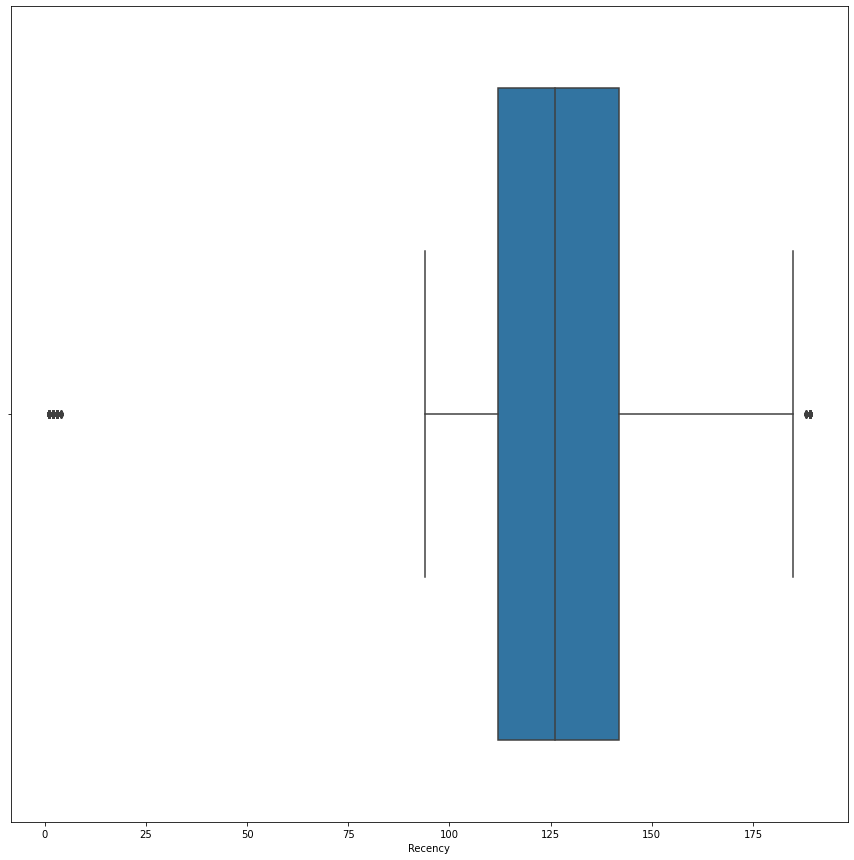

In [47]:
plt.figure(figsize=(15,15))
sns.boxplot(RFMScore["Recency"])

<AxesSubplot:xlabel='Frequency'>

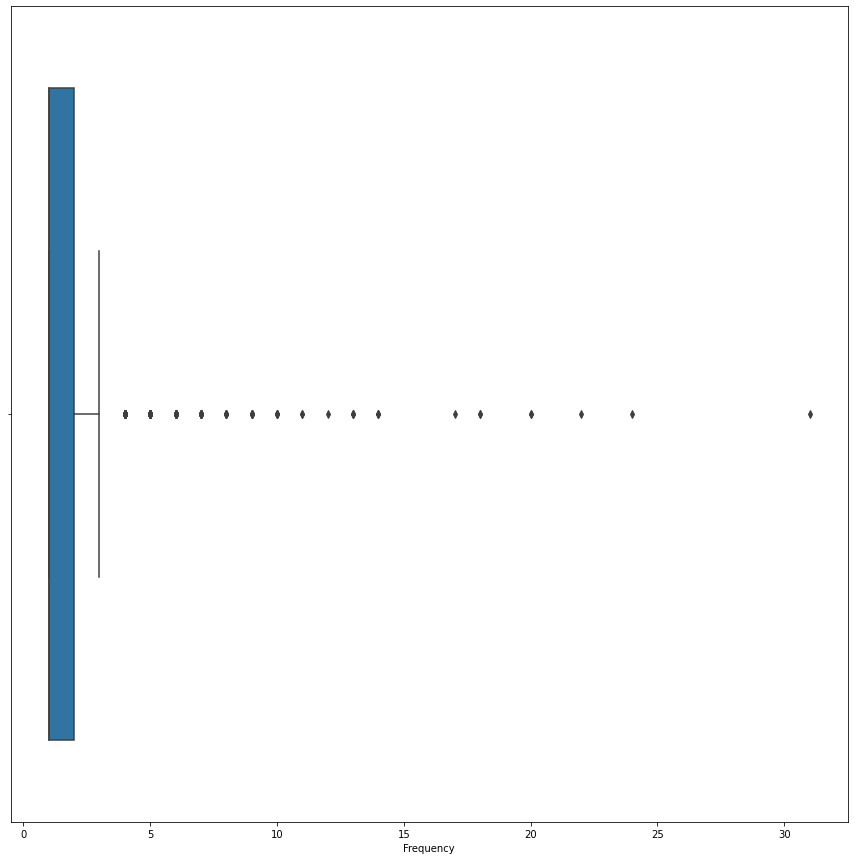

In [48]:
plt.figure(figsize=(15,15))
sns.boxplot(RFMScore["Frequency"])

<AxesSubplot:xlabel='Monetary'>

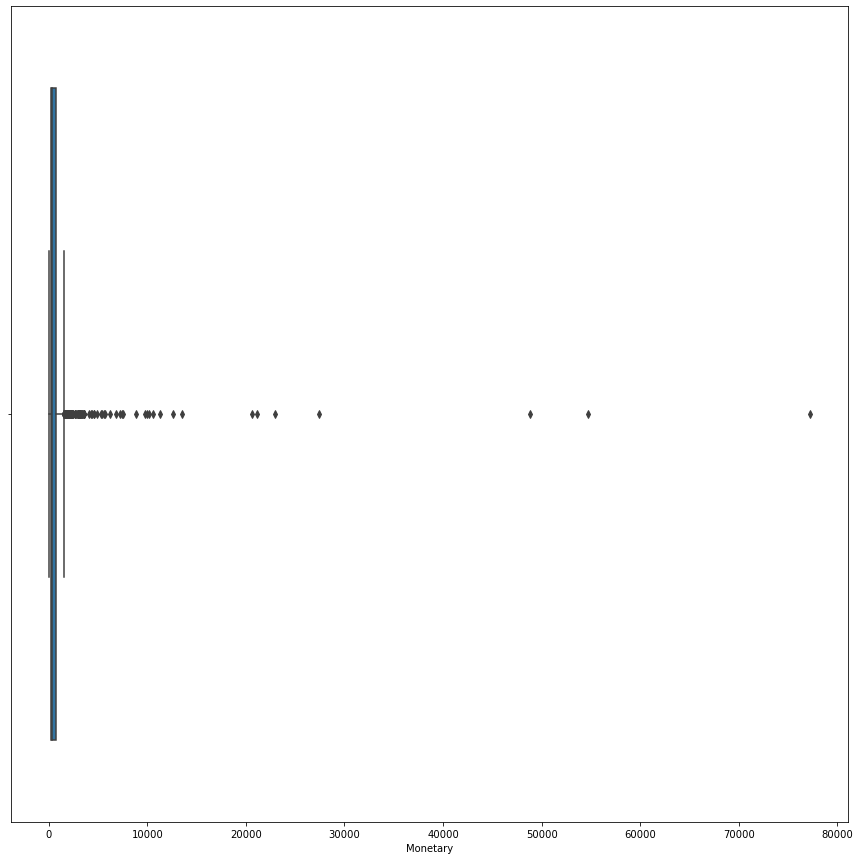

In [49]:
plt.figure(figsize=(15,15))
sns.boxplot(RFMScore["Monetary"])

<AxesSubplot:ylabel='Monetary'>

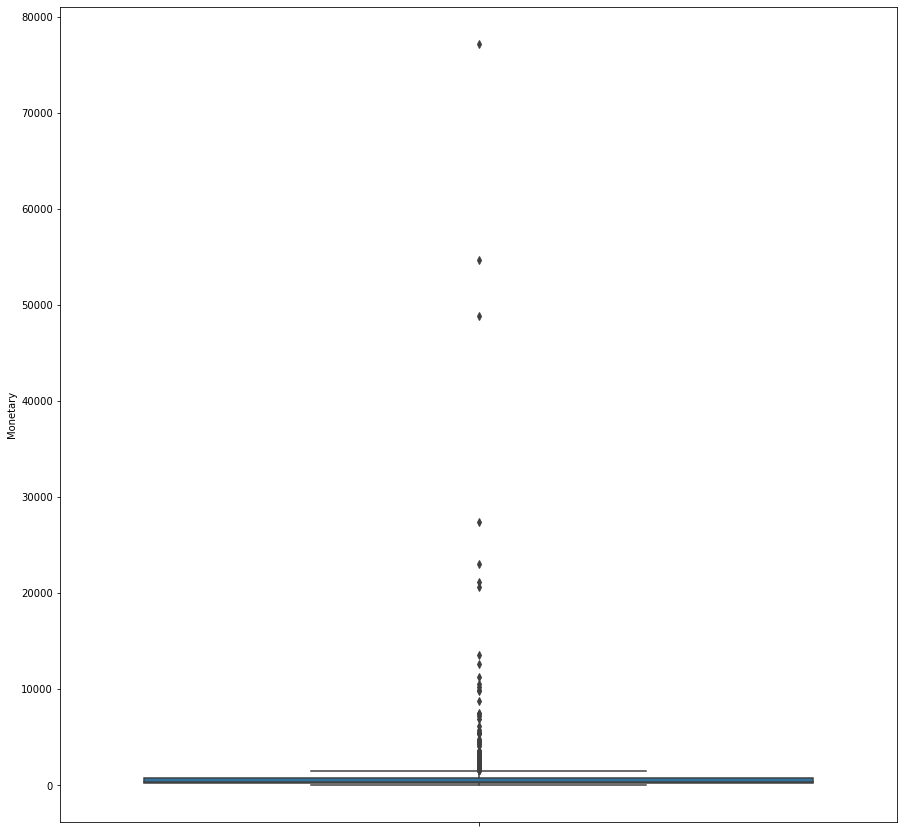

In [50]:
plt.figure(figsize=(15,15))
sns.boxplot(y="Monetary",data=RFMScore)

In [51]:
df_final["CustomerID"].value_counts()

14606.0    31
15311.0    24
13089.0    22
14911.0    20
17841.0    20
           ..
17602.0     1
13502.0     1
14784.0     1
15938.0     1
13571.0     1
Name: CustomerID, Length: 1428, dtype: int64

In [52]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


### Our function to define R, F and M segment

In [53]:
def Rscoring (x,p,d):
    if x<=d[p][0.25]:# we can say lowest the recency highest the marks
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

    
def Fscoring (x,p,d):# we can say highest the frequency  highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def Mscoring (x,p,d):# we can say highest the monetary highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4    

In [54]:
RFMScore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [55]:
RFMScore["R"]=RFMScore["Recency"].apply(Rscoring,args=("Recency",quantiles,))
RFMScore["F"]=RFMScore["Frequency"].apply(Fscoring,args=("Frequency",quantiles,))
RFMScore["M"]=RFMScore["Monetary"].apply(Mscoring,args=("Monetary",quantiles,))

In [56]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,77183.60,2,3,4
1,12347.0,134,1,475.39,2,1,3
2,12348.0,135,2,1120.24,2,3,4
3,12350.0,127,1,334.40,2,1,2
4,12352.0,100,5,1281.15,4,4,4


### We have made a basic screening of DATA, now we can apply our sale and  management skill

### We can create a column which define a combind string RFM_ID to indentify the type of customer

In [57]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID
0,12346.0,142,2,77183.60,2,3,4,234
1,12347.0,134,1,475.39,2,1,3,213
2,12348.0,135,2,1120.24,2,3,4,234
3,12350.0,127,1,334.40,2,1,2,212
4,12352.0,100,5,1281.15,4,4,4,444


In [58]:
RFMScore["RFM_SUM"]=RFMScore[["R","M","F"]].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM
0,12346.0,142,2,77183.60,2,3,4,234,9
1,12347.0,134,1,475.39,2,1,3,213,6
2,12348.0,135,2,1120.24,2,3,4,234,9
3,12350.0,127,1,334.40,2,1,2,212,5
4,12352.0,100,5,1281.15,4,4,4,444,12


### We can say higher the RMF_SUM score better the customer

In [59]:
# Assign Loyality level to each customer
Loyality_level=["Silver","Gold","Diamond","Platinum"]# creating loyality levels
score_cuts=pd.qcut(RFMScore.RFM_SUM,q=4,labels=Loyality_level)# qcut is a function work on quantile basis, 
#here we are applying quantile on RMS_SUM column. 
# we use q=4 means we need 4 no. of quatile , 
#q1=25% lowest RMS_SUM Value, q2,q3,q4 high , more higher value. applying labels as Loyality_level which 4 in number .
RFMScore["RFM_Loyality"]=score_cuts.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond
1,12347.0,134,1,475.39,2,1,3,213,6,Gold
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond
3,12350.0,127,1,334.40,2,1,2,212,5,Silver
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum


In [60]:
# validate the data for RFM_ID = 444
RFMScore[RFMScore["RFM_ID"]=="444"].sort_values("Monetary",ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality
587,14646.0,108,10,54654.32,4,4,4,444,12,Platinum
1386,18102.0,2,7,48851.37,4,4,4,444,12,Platinum
449,14156.0,3,7,27449.12,4,4,4,444,12,Platinum
682,15061.0,1,18,13538.52,4,4,4,444,12,Platinum
749,15311.0,2,24,12611.05,4,4,4,444,12,Platinum


## For clustering purpose we only need  CustomerID	Recency	Frequency	Monetary

## So we create a new dataset

In [61]:
Newdata=RFMScore[["CustomerID","Recency","Frequency","Monetary"]]
Newdata

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


## HERE IS OUTLIER SO WE USE STANDARIZATION APPROAC

In [62]:
scaljob=StandardScaler()
scaled_data=scaljob.fit_transform(Newdata)
scaled_data

array([[-1.64897696,  0.53270017, -0.02604346, 23.72499212],
       [-1.64840727,  0.36579398, -0.46878225, -0.11003694],
       [-1.64783758,  0.38665725, -0.02604346,  0.09033299],
       ...,
       [ 1.72529952,  1.22118823, -0.46878225, -0.25775169],
       [ 1.72985705,  0.38665725, -0.46878225, -0.25775169],
       [ 1.73327519,  0.4283838 , -0.02604346, -0.19094618]])

### We are getting the array value we sould change it in DATAFRAME 

In [63]:
scaled_data_DF=pd.DataFrame(scaled_data,index=Newdata.index,columns=Newdata.columns)


In [64]:
scaled_data_DF

,CustomerID,Recency,Frequency,Monetary
0,-1.648977,0.532700,-0.026043,23.724992
1,-1.648407,0.365794,-0.468782,-0.110037
2,-1.647838,0.386657,-0.026043,0.090333
3,-1.646698,0.219751,-0.468782,-0.153846
4,-1.645559,-0.343557,1.302173,0.140331
...,...,...,...,...
1423,1.718463,-0.072335,-0.468782,-0.155710
1424,1.720172,0.470110,0.416695,-0.012973
1425,1.725300,1.221188,-0.468782,-0.257752
1426,1.729857,0.386657,-0.468782,-0.257752


# BUILD CLUSTERING MODEL

In [65]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)

In [66]:
km=km.fit(scaled_data_DF)
sum_of_sq_dist[k]=km.inertia_

## Model building is done, now we can see the visualization to get the best k value by elbow method.

### Visulization for getting elbow method to find the actual k value.

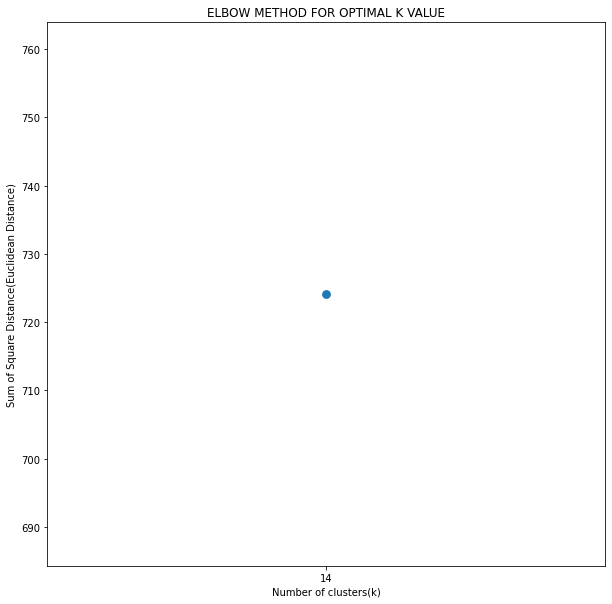

In [71]:
plt.figure(figsize=(10,10))
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

In [69]:
km=KMeans(n_clusters=14,init="k-means++",max_iter=100)

In [70]:
y_kmeans=km.fit_predict(scaled_data_DF)
y_kmeans

array([13,  6,  6, ..., 10,  4,  4])

In [72]:
RFMScore["CLUSTER"]=km.labels_

In [74]:
seg_map = {
    r'[1][1-2][2-3]': 'Inactive',
    r'[1-2][1-3][3]': 'at_Risk',
    r'[1-2][1-4][4]': 'cant_loose',
    r'[1][1-4][2-4]': 'about_to_sleep',
    r'[3][3][3]': 'need_attention',
    r'[2-4][3-4][3-4]': 'loyal_customers',
    r'[3-4][3-4][2-4]': 'promising',
    r'[1-2][1-4][1-2]': 'new_customers',
    r'[2-4][2-3][2]': 'potential_loyalists',
    r'[3-4][1-3][1-2]': 'promising',
    r'[3-4][2-4][1-2]': 'new_customers',
    r'[3-4][1-3][2-4]': 'potential_loyalists',
    r'[3-4][3-4][3-4]': 'Most Important'
    
}
RFMScore['segment'] = RFMScore['RFM_ID'].replace(seg_map, regex=True)
#RMFScore_final(inplace=True)
#RMFScore_final.reset_index(inplace=True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,13,cant_loose
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,6,at_Risk
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,6,cant_loose
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,6,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,11,loyal_customers


In [75]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,13,cant_loose
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,6,at_Risk
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,6,cant_loose
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,6,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,11,loyal_customers


In [83]:
RFMScore['segment'].value_counts()

new_customers          315
loyal_customers        311
promising              286
Inactive               148
cant_loose             119
potential_loyalists    104
at_Risk                 93
need_attention          30
about_to_sleep          22
Name: segment, dtype: int64

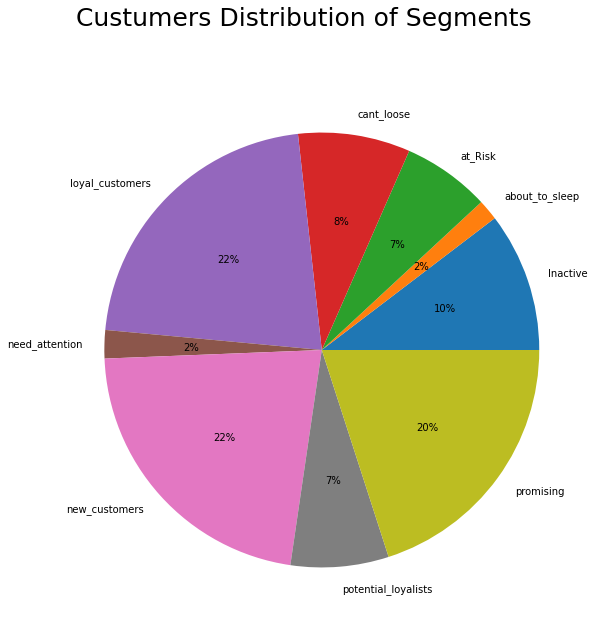

In [84]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [85]:
agg_list=["mean", "count", "max"]
RFMScore[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(agg_list)

Recency            Frequency               Monetary  \
                           mean count  max      mean count max         mean   
segment                                                                       
Inactive             163.587838   148  189  1.000000   148   1   330.812838   
about_to_sleep       159.500000    22  189  2.454545    22   5   314.050000   
at_Risk              135.419355    93  170  1.494624    93   2   499.497742   
cant_loose           141.302521   119  189  2.176471   119   7  2271.179328   
loyal_customers       82.360129   311  135  4.536977   311  31  2019.859936   
need_attention       119.466667    30  126  2.000000    30   2   507.592667   
new_customers        145.152381   315  189  1.228571   315   6   151.433302   
potential_loyalists   94.173077   104  126  1.000000   104   1   648.698942   
promising             85.562937   286  126  1.321678   286   6   186.690175   

                                     
                    count       max  
segment                              
Inactive              148    716.11  
about_to_sleep         22    640.12  
at_Risk                93    717.02  
cant_loose            119  77183.60  
loyal_customers       311  54654.32  
need_attention         30    688.80  
new_customers         315    340.24  
potential_loyalists   104   1784.71  
promising             286    340.56

# Apparently there are 22% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience.